# Formative Assessment

k-Means puts data points in predetermined clusters. There is another algorithm allows the learning algorithm to determine the number of clusters. This is a hierarchical clustering algorithm. An agglomerative clustering algorithm builds clusters using a bottom up approach. Each data point starts off in its own cluster. The algorithm then iteratively combines clusters until it forms one cluster. 

The results of the algorithm are shown using a dendogram. A dendogram is an upside down tree. At the bottom are the singleton clusters or clusters with single data points. At the top of the tree is a root, or the single cluster. 

### The data

The dataset was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Air+quality) and "contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005, for one year. Hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value."

The following are the descriptions of the columns we will be working with:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in °C
    13 Relative Humidity (%)
    14 AH Absolute Humidity 
    

### The goal
The goal of the assessment is to determine the optimal number of clusters for the learning algorithm. Use the agglomerative clustering technique in the `scipy` package to do this. Use the dataset `AirQualityUCI.csv`. More specifically, determine if there is a relationship between the predictor features `PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)` and `True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)`

### Import the libraries

Import the necessary libraries for file manipulation and learning algorithms. Do not forget to upload the visualizations packages as well.

In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics

In [2]:
%matplotlib inline

### Preprocess the data

Observe that there a missing values in the dataset. Imput missing values with the mean or median. Can you make any suggestions for standardizing or normalising the data points?

In [3]:
data = pd.read_csv('AirQualityUCI.csv')

In [4]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,0.7578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,0.7255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,0.7502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,0.7867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,0.7888


### Look at the data for any missing values, if found I replace them with a calculated median value.

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.replace(-200.0, data.median(), inplace=True)

### Visualizeing the data

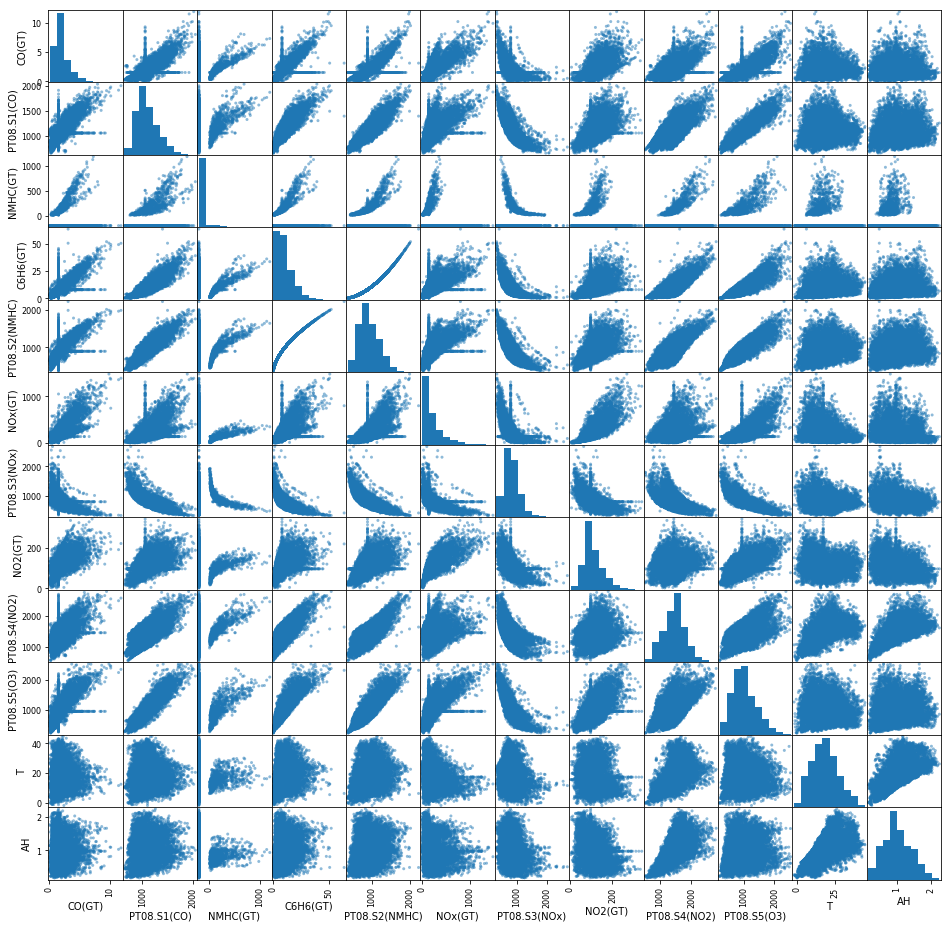

In [7]:
scatter_matrix(data, figsize=(16,16));

### Choose the optimal number of clusters using a dendogram

Before attempting to solve the problem, separate the predictor features in the dataset from the target feature. That is, create a matrix, usually named X, to store the predictor values.

The code to determine the optimal number of clusters is illustrated. Given the predictor matrix, X, use the following code to determine the number of clusters.

    import scipy.cluster.hierarchy as sch
    Z = sch.linkage(X, 'ward')
    plt.figure(figsize=(12,7))
    dendogram = sch.dendrogram(Z)
    
Use the `scipy.cluster.hierarchy` package to design a dendogram. 

The option 'ward' is a distance measure that minimizes the variance between clusters.

In [8]:
X = data.as_matrix(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)'])

In [9]:
X

array([[1360., 1046.],
       [1292.,  955.],
       [1402.,  939.],
       ...,
       [1142., 1063.],
       [1003.,  961.],
       [1071., 1047.]])

Text(0,0.5,'air quality in units')

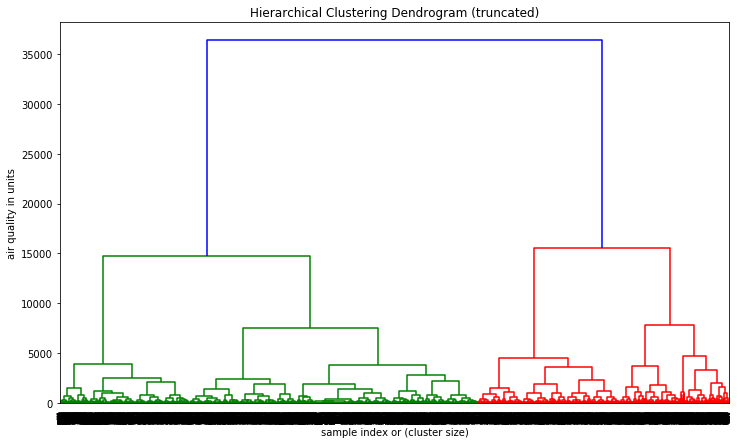

In [43]:
Z = sch.linkage(X, 'ward')
plt.figure(figsize=(12,7))
dendogram = sch.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('air quality in units')

#### What is the optimal number of clusters?

The resulting diagram shows the data points on the x-axis and dissimilarity scores on the y-axis. For this exercises, let's use a dissimilarity score of 10000. A horizontal line from the threshold value intersects three branches of the dendogram. Use three as the number of clusters to for the model.

#### Cluster selection = 3

### Fit the model and do some predictions

Instead of k-Means, we'll use agglomerative clustering. Create a clustering model using the following code:

    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    
Then fit your model and predict using the model.

In [27]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y = hc.fit_predict(X)

In [45]:
print("Predicted score:",metrics.silhouette_score(X, y))

Predicted score: 0.4098465898927145


Determine the labes of the clustering model.

In [47]:
# xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
# ylabel('PT08.S2 (titania) hourly averaged sensor response')

### Visualize the clusters

Visualize the clusters with a scatter plot. Colour-code the different clusters. 

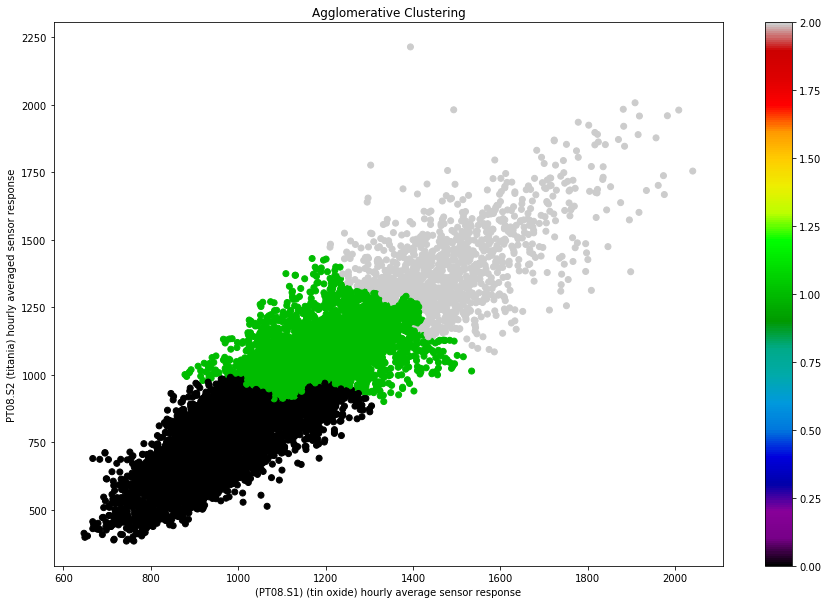

In [54]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.spectral)
ax.set_title('Agglomerative Clustering')
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response')
plt.colorbar()

### Different type of scatter plot 

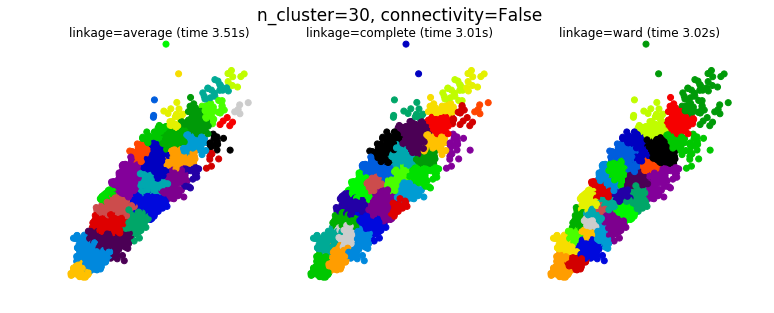

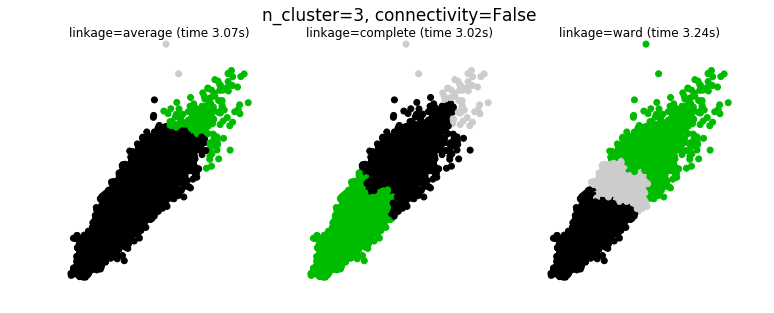

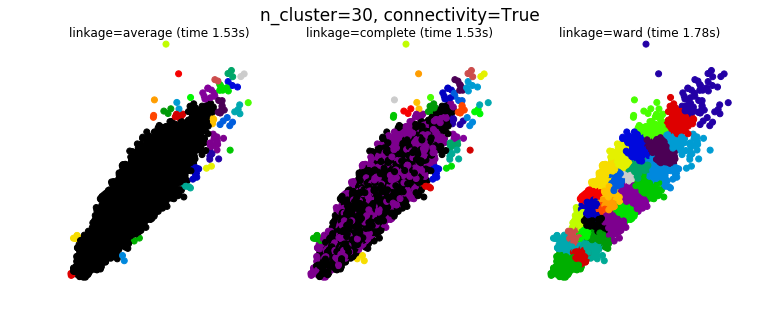

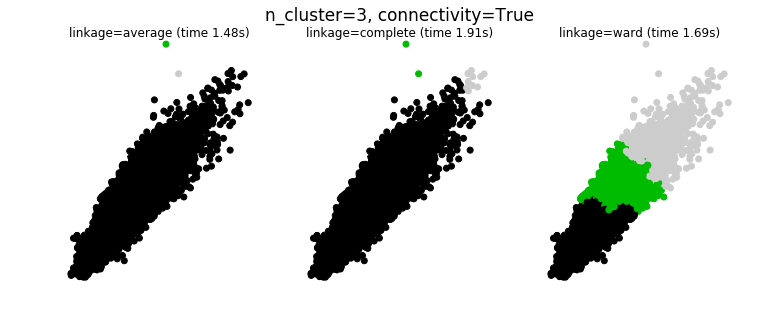

In [39]:
import time
from sklearn.neighbors import kneighbors_graph

knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

### Performance

In [1]:
from sklearn import metrics

### Interpretation

The modeling technique using three clusters is able to separate the data into acceptable clusters.
The predictions is low though at 0.4

### More clusters

Do more clusters mean anything?

Begin with 5 clusters.

In [55]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y = hc.fit_predict(X)

In [56]:
print("Predicted score:",metrics.silhouette_score(X, y))

Predicted score: 0.37221744445408667


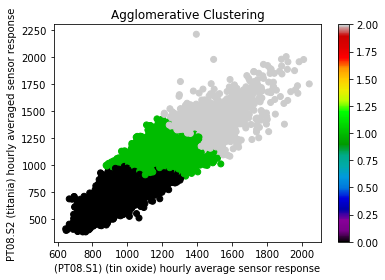

In [62]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.spectral)
ax.set_title('Agglomerative Clustering')
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response')
plt.colorbar()

For 10 clusters.

In [58]:
hc = AgglomerativeClustering(n_clusters=10, linkage='ward')
y = hc.fit_predict(X)

In [59]:
print("Predicted score:",metrics.silhouette_score(X, y))

Predicted score: 0.27765111053485897


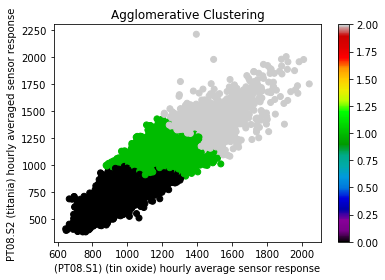

In [61]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.spectral)
ax.set_title('Agglomerative Clustering')
plt.xlabel('(PT08.S1) (tin oxide) hourly average sensor response')
plt.ylabel('PT08.S2 (titania) hourly averaged sensor response')
plt.colorbar()

Prove a interpretation for the performance variation when the number of clusters are increased.

### My interpritation

#### For 3 clusters
Sore was: 0.4098465898927145

#### For 5 clusters
Sore was: 0.37221744445408667

#### For 10 clusters
Sore was: 0.27765111053485897

Having more clusters (3 -> 5 -> 10) does not inprove the result or higher fir for this model.

## Additional material

[Machine learning in GIS. Hierarchical Clustering for Urban Brownfields analysis.](https://www.linkedin.com/pulse/machine-learning-gis-hierarchical-clustering-urban-bielinskas)